In [1]:
var openDigger = require('../src/open_digger');
var year = 2023, startMonth = 1, endMonth = 12, startYear = 2019
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var baseOptions = {
    startYear, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

## 基金会洞察

### 全球基金会旗下项目OpenRank Top 10

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: ['Foundation'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────┬─────────────┐
│ (index) │     id      │ platform │          name           │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────────┼─────────────┤
│    0    │ '10919030'  │ 'Gitee'  │   'openharmony/docs'    │ [ 5203.18 ] │
│    1    │ '20580498'  │ 'GitHub' │ 'kubernetes/kubernetes' │ [ 4442.18 ] │
│    2    │ '99919302'  │ 'GitHub' │     'apache/doris'      │ [ 3860.91 ] │
│    3    │ '33884891'  │ 'GitHub' │    'apache/airflow'     │ [ 2864.32 ] │
│    4    │ '48109239'  │ 'GitHub' │     'cilium/cilium'     │ [ 2825.33 ] │
│    5    │ '236095576' │ 'GitHub' │  'backstage/backstage'  │ [ 2706.48 ] │
│    6    │ '51478266'  │ 'GitHub' │  'kubernetes/website'   │ [ 2669.5 ]  │
│    7    │ '17165658'  │ 'GitHub' │     'apache/spark'      │ [ 2570.78 ] │
│    8    │ '65214191'  │ 'GitHub' │   'envoyproxy/envoy'    │ [ 2555.24 ] │
│    9    │ '11125589'  │ 'GitHub' │   'keycloak/keycloak'   │ [ 2441.1 ]  │

In [3]:
var processFoundationFieldData = (label, title) => {
    var years = [2020, 2021, 2022, 2023, 2024];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: label, limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2020-2024`});
    });
};

### 全球基金会旗下项目OpenRank Top 10 变化趋势

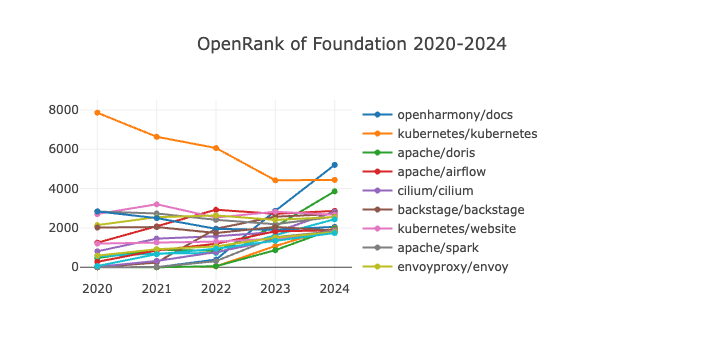

In [4]:
processFoundationFieldData(['Foundation'], 'Foundation');

### 各基金会 OpenRank 变化趋势

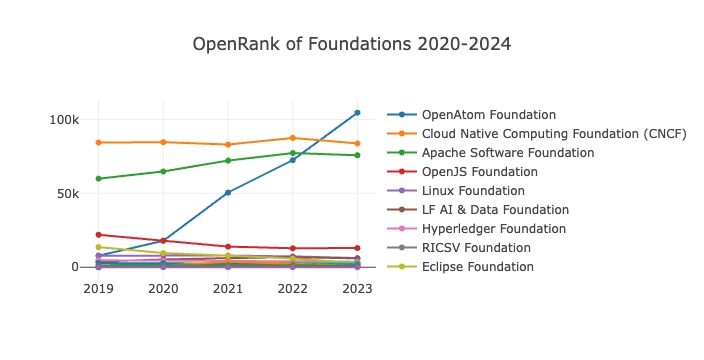

In [5]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations'],
    startYear: 2020, endYear: 2024, endMonth: 12,
    groupBy: 'Foundation',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':foundations'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Foundations 2020-2024`, xaxis: { type: 'category' }});
})

### 中国基金会旗下项目OpenRank Top 10

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Foundation'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                    name                    │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────────┼─────────────┤
│    0    │ '10919030'  │ 'Gitee'  │             'openharmony/docs'             │ [ 5203.18 ] │
│    1    │ '99919302'  │ 'GitHub' │               'apache/doris'               │ [ 3860.91 ] │
│    2    │ '16184969'  │ 'Gitee'  │      'openharmony/graphic_graphic_2d'      │  [ 1996 ]   │
│    3    │ '16184977'  │ 'Gitee'  │       'openharmony/interface_sdk-js'       │ [ 1968.59 ] │
│    4    │ '11218621'  │ 'Gitee'  │           'openharmony/xts_acts'           │ [ 1834.14 ] │
│    5    │ '208728772' │ 'GitHub' │             'milvus-io/milvus'             │ [ 1741.56 ] │
│    6    │ '20587599'  │ 'GitHub' │               'apache/flink'               │ [ 1658.51 ] │
│    7    │ '49876476'  │ 'GitHub' │    

### 中国基金会旗下项目OpenRank Top 10 变化趋势

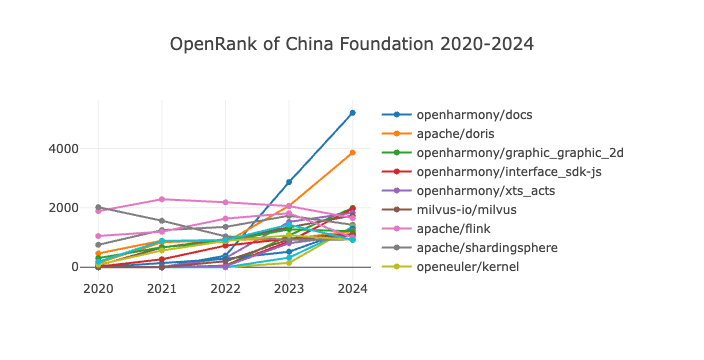

In [7]:
processFoundationFieldData([':regions/CN', 'Foundation'], 'China Foundation');

## 各基金会旗下项目OpenRank TOP 10 榜单

### CNCF

In [8]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/linux_foundation/cncf'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                       name                       │  openrank   │
├─────────┼─────────────┼──────────┼──────────────────────────────────────────────────┼─────────────┤
│    0    │ '20580498'  │ 'GitHub' │             'kubernetes/kubernetes'              │ [ 4442.18 ] │
│    1    │ '48109239'  │ 'GitHub' │                 'cilium/cilium'                  │ [ 2825.33 ] │
│    2    │ '236095576' │ 'GitHub' │              'backstage/backstage'               │ [ 2706.48 ] │
│    3    │ '51478266'  │ 'GitHub' │               'kubernetes/website'               │ [ 2669.5 ]  │
│    4    │ '65214191'  │ 'GitHub' │                'envoyproxy/envoy'                │ [ 2555.24 ] │
│    5    │ '11125589'  │ 'GitHub' │               'keycloak/keycloak'                │ [ 2441.1 ]  │
│    6    │ '196414933' │ 'GitHub' │ 'open-telemetry/opentelemetry-collector-contr

### lfai

In [9]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/linux_foundation/lfai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────┬─────────────┐
│ (index) │     id      │ platform │        name         │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────┼─────────────┤
│    0    │ '208728772' │ 'GitHub' │ 'milvus-io/milvus'  │ [ 1741.56 ] │
│    1    │ '182849188' │ 'GitHub' │  'delta-io/delta'   │ [ 518.57 ]  │
│    2    │ '241400276' │ 'GitHub' │  'onnx/onnx-mlir'   │ [ 514.98 ]  │
│    3    │ '182067506' │ 'GitHub' │  'kedro-org/kedro'  │ [ 486.66 ]  │
│    4    │ '163346054' │ 'GitHub' │ 'ludwig-ai/ludwig'  │ [ 447.81 ]  │
│    5    │ '216628419' │ 'GitHub' │  'flyteorg/flyte'   │ [ 413.69 ]  │
│    6    │ '102692863' │ 'GitHub' │     'onnx/onnx'     │ [ 326.21 ]  │
│    7    │ '178075572' │ 'GitHub' │   'kserve/kserve'   │ [ 319.21 ]  │
│    8    │ '167349656' │ 'GitHub' │ 'FederatedAI/FATE'  │ [ 319.19 ]  │
│    9    │ '203634431' │ 'GitHub' │ 'flyteorg/flytekit' │ [ 288.78 ]  │
└─────────┴─────────────┴──────────┴───────────────

### OpenAtom

In [10]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openatom'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,groupBy: 'Project',
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬──────────────────────────────────┬──────────┬───────────────┬──────────────┐
│ (index) │                id                │ platform │     name      │   openrank   │
├─────────┼──────────────────────────────────┼──────────┼───────────────┼──────────────┤
│    0    │ ':companies/huawei/openharmony'  │  'All'   │ 'OpenHarmony' │ [ 38824.59 ] │
│    1    │  ':companies/huawei/openeuler'   │  'All'   │  'openEuler'  │ [ 22046.2 ]  │
│    2    │   ':companies/alibaba/anolis'    │  'All'   │  'Anolis OS'  │ [ 4491.63 ]  │
│    3    │ ':companies/openkylin/openkylin' │  'All'   │  'openKylin'  │ [ 4102.34 ]  │
│    4    │   ':foundations/openatom/taro'   │  'All'   │    'Taro'     │  [ 931.52 ]  │
│    5    │   ':foundations/openatom/ubml'   │  'All'   │    'UBML'     │  [ 242.06 ]  │
│    6    │    ':companies/360/pikiwidb'     │  'All'   │  'PikiwiDB'   │   [ 230 ]    │
│    7    │  ':companies/antgroup/tongsuo'   │  'All'   │   'Tongsuo'   │  [ 190.79 ]  │
│    8    │ ':foundat

### Apache

In [11]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/apache'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────┬─────────────┐
│ (index) │     id      │ platform │       name        │  openrank   │
├─────────┼─────────────┼──────────┼───────────────────┼─────────────┤
│    0    │ '99919302'  │ 'GitHub' │  'apache/doris'   │ [ 3860.91 ] │
│    1    │ '33884891'  │ 'GitHub' │ 'apache/airflow'  │ [ 2864.32 ] │
│    2    │ '17165658'  │ 'GitHub' │  'apache/spark'   │ [ 2570.78 ] │
│    3    │ '76474200'  │ 'GitHub' │   'apache/hudi'   │ [ 1877.23 ] │
│    4    │ '50904245'  │ 'GitHub' │   'apache/beam'   │ [ 1867.82 ] │
│    5    │ '51905353'  │ 'GitHub' │  'apache/arrow'   │ [ 1860.12 ] │
│    6    │ '39464018'  │ 'GitHub' │ 'apache/superset' │ [ 1670.45 ] │
│    7    │ '20587599'  │ 'GitHub' │  'apache/flink'   │ [ 1658.51 ] │
│    8    │  '2211243'  │ 'GitHub' │  'apache/kafka'   │ [ 1644.91 ] │
│    9    │ '158256479' │ 'GitHub' │ 'apache/iceberg'  │ [ 1473.98 ] │
└─────────┴─────────────┴──────────┴───────────────────┴─────────────┘


### Eclipse

In [12]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/eclipse'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────┬────────────┐
│ (index) │     id      │ platform │           name           │  openrank  │
├─────────┼─────────────┼──────────┼──────────────────────────┼────────────┤
│    0    │ '108592307' │ 'GitHub' │      'eclipse/sumo'      │ [ 487.57 ] │
│    1    │  '2045207'  │ 'GitHub' │ 'eclipse/jetty.project'  │ [ 355.12 ] │
│    2    │ '15237269'  │ 'GitHub' │      'eclipse/kura'      │ [ 264.66 ] │
│    3    │ '53077478'  │ 'GitHub' │      'eclipse/omr'       │ [ 257.6 ]  │
│    4    │ '32935745'  │ 'GitHub' │      'eclipse/che'       │ [ 231.98 ] │
│    5    │ '259645903' │ 'GitHub' │  'eclipse/kiso-testing'  │ [ 167.25 ] │
│    6    │  '1553758'  │ 'GitHub' │     'eclipse/xtext'      │ [ 149.69 ] │
│    7    │ '45860898'  │ 'GitHub' │    'eclipse/hawkbit'     │ [ 145.15 ] │
│    8    │ '53614190'  │ 'GitHub' │   'eclipse/mosquitto'    │ [ 131.04 ] │
│    9    │ '62056780'  │ 'GitHub' │ 'eclipse/eclipse.jdt.ls' │ [ 125.88 ] │

### OpenInfra

In [13]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openinfra'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────────────────────┬────────────┐
│ (index) │     id      │ platform │               name                │  openrank  │
├─────────┼─────────────┼──────────┼───────────────────────────────────┼────────────┤
│    0    │ '113404957' │ 'GitHub' │ 'kata-containers/kata-containers' │ [ 1115.2 ] │
│    1    │ '110539912' │ 'GitHub' │      'kata-containers/tests'      │ [ 148.75 ] │
│    2    │ '113113705' │ 'GitHub' │    'kata-containers/community'    │ [ 21.04 ]  │
│    3    │ '293399774' │ 'GitHub' │   'kata-containers/cgroups-rs'    │ [ 18.37 ]  │
│    4    │  '5320283'  │ 'GitHub' │     'openstack/requirements'      │ [ 17.79 ]  │
│    5    │ '119962177' │ 'GitHub' │       'kata-containers/ci'        │  [ 12.1 ]  │
│    6    │  '6929734'  │ 'GitHub' │        'openstack/cinder'         │ [ 11.08 ]  │
│    7    │  '790031'   │ 'GitHub' │         'openstack/nova'          │  [ 9.16 ]  │
│    8    │ '24245238'  │ 'GitHub' │        'openstack

### OpenJs

In [14]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openjs'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬────────────┬──────────┬────────────────────────────┬──────────────┐
│ (index) │     id     │ platform │            name            │   openrank   │
├─────────┼────────────┼──────────┼────────────────────────────┼──────────────┤
│    0    │ '4542716'  │ 'GitHub' │      'NixOS/nixpkgs'       │ [ 18075.14 ] │
│    1    │ '12888993' │ 'GitHub' │   'home-assistant/core'    │ [ 10958.68 ] │
│    2    │ '65600975' │ 'GitHub' │     'pytorch/pytorch'      │ [ 10288.27 ] │
│    3    │ '41881900' │ 'GitHub' │     'microsoft/vscode'     │ [ 9875.34 ]  │
│    4    │ '8649239'  │ 'Gitee'  │   'mindspore/mindspore'    │ [ 8735.43 ]  │
│    5    │ '19745004' │ 'GitHub' │        'odoo/odoo'         │ [ 8656.81 ]  │
│    6    │ '72685026' │ 'GitHub' │ 'MicrosoftDocs/azure-docs' │ [ 8021.57 ]  │
│    7    │ '75821432' │ 'GitHub' │    'llvm/llvm-project'     │ [ 7991.01 ]  │
│    8    │ '15634981' │ 'GitHub' │    'godotengine/godot'     │ [ 7705.45 ]  │
│    9    │ '31792824' │ 'GitHub' │     

## 近5年各基金会旗下项目OpenRank变化趋势

In [15]:
var processTechFieldData = (label, title) => {
    var years = [2020, 2021, 2022, 2023, 2024];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2020-2024`});
    });
};

### CNCF

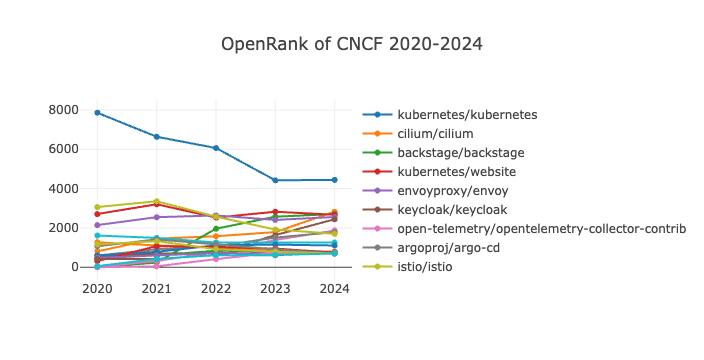

In [16]:
processTechFieldData(':foundations/linux_foundation/cncf', 'CNCF');

### lfai

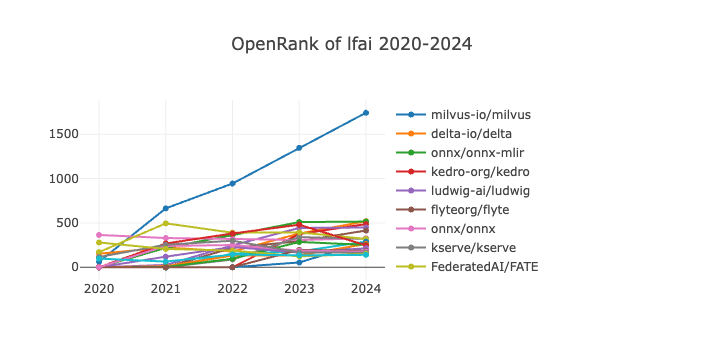

In [17]:
processTechFieldData(':foundations/linux_foundation/lfai', 'lfai');

### OpenAtom

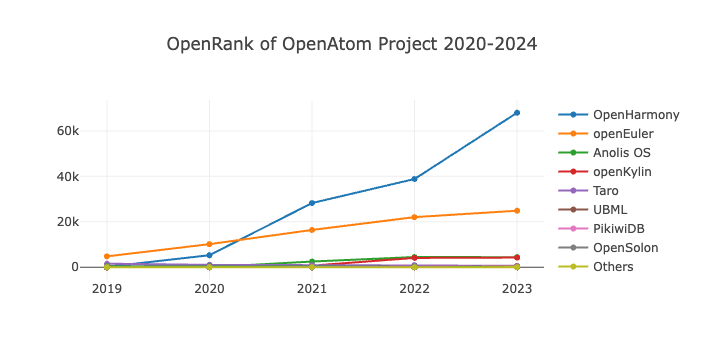

In [18]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openatom'],
    startYear: 2020, endYear: 2024, endMonth: 12,
    groupBy: 'Project',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    // var data = data.filter(i => i.id.startsWith(':technology'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of OpenAtom Project 2020-2024`, xaxis: { type: 'category' }});
})

### Apache

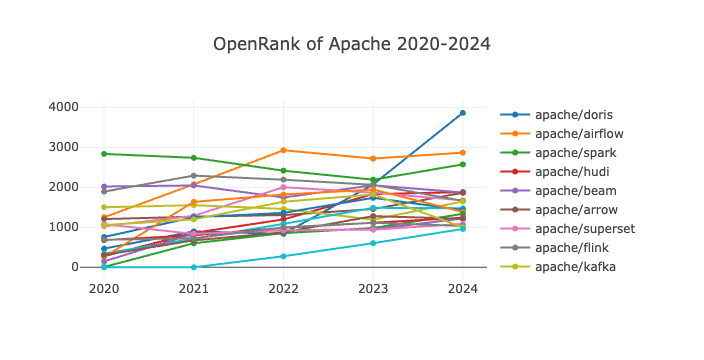

In [19]:
processTechFieldData(':foundations/apache', 'Apache');

### Eclipse

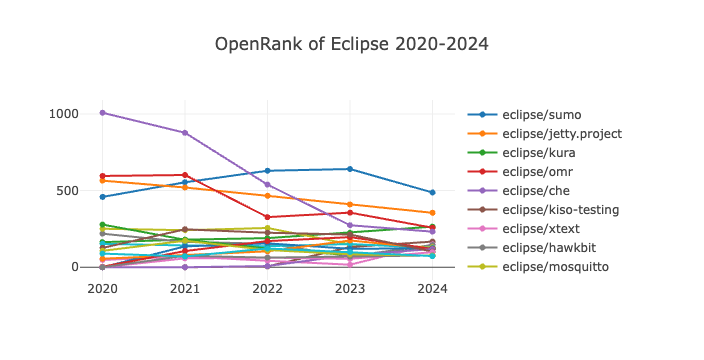

In [20]:
processTechFieldData(':foundations/eclipse', 'Eclipse');

### OpenInfra

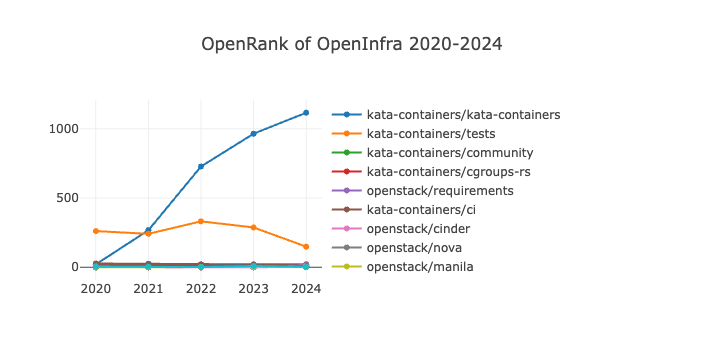

In [21]:
processTechFieldData(':foundations/openinfra', 'OpenInfra');

### OpenJs

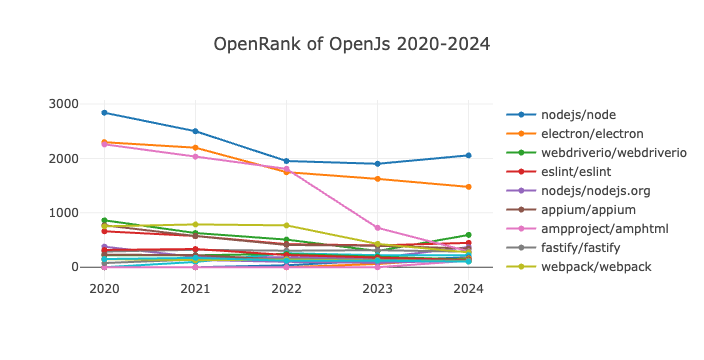

In [22]:
processTechFieldData(':foundations/linux_foundation/openjs', 'OpenJs');